## applymap 활용

In [357]:
import pandas as pd
import numpy as np
PATH = '../DATA_WOO/'
FILENAME = PATH + 'titanic.csv'
shipdf = pd.read_csv(FILENAME, index_col=0)
shipdf

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [358]:
subdf = shipdf.loc[:5, ['Age', 'Fare']]
subdf['Value'] = 10
subdf

,Age,Fare,Value
PassengerId,,,
1,22.0,7.2500,10
2,38.0,71.2833,10
3,26.0,7.9250,10
4,35.0,53.1000,10
5,35.0,8.0500,10


# Applymap: 원소 낱개로 입력되어서 결과값으로 데이터프레임으로 나온다.

In [359]:
# 사용자 정의 함수
def addvalue(x):
    print(f'debug:    {x}\n' ) 
    return x + x
    
def addTwovalue(x,y):
    print(f'debug:{x}, {y}\n') 
    return x+y

def missingValueCheck(sr):
    return sr.isnull()
    
def missingValueCount(sr):
    return sr.isnull().sum()

In [360]:
subdf.applymap(np.sum), subdf.apply(np.sum)

(              Age     Fare  Value
 PassengerId                      
 1            22.0   7.2500     10
 2            38.0  71.2833     10
 3            26.0   7.9250     10
 4            35.0  53.1000     10
 5            35.0   8.0500     10,
 Age      156.0000
 Fare     147.6083
 Value     50.0000
 dtype: float64)

In [361]:
# 시리즈 단위가 아닌 원소 하나하나 계산
subdf.applymap(addvalue)

debug:    22.0

debug:    38.0

debug:    26.0

debug:    35.0

debug:    35.0

debug:    7.25

debug:    71.2833

debug:    7.925

debug:    53.1

debug:    8.05

debug:    10

debug:    10

debug:    10

debug:    10

debug:    10



,Age,Fare,Value
PassengerId,,,
1,44.0,14.5000,20
2,76.0,142.5666,20
3,52.0,15.8500,20
4,70.0,106.2000,20
5,70.0,16.1000,20


In [362]:
# 함수 매핑 (pipe)
subdf.pipe(addvalue)

debug:                  Age     Fare  Value
PassengerId                      
1            22.0   7.2500     10
2            38.0  71.2833     10
3            26.0   7.9250     10
4            35.0  53.1000     10
5            35.0   8.0500     10



,Age,Fare,Value
PassengerId,,,
1,44.0,14.5000,20
2,76.0,142.5666,20
3,52.0,15.8500,20
4,70.0,106.2000,20
5,70.0,16.1000,20


In [363]:
subdf.pipe(np.sum)

Age      156.0000
Fare     147.6083
Value     50.0000
dtype: float64

In [364]:
d1 = pd.DataFrame([[1,2],[3,4]])
d2 = pd.DataFrame([[6,7],[5,2]])
d1.dot(d1)

,0,1
0,7,10
1,15,22


In [365]:
shipdf
# 결측치 처리
# pclass -> 범주형
# Sex, Ticket, Cabin, Embarked -> 범주형
# age를 10대 20대 30대 로 분류
# 생존확률이 가장높은 확률

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [366]:
# 결측치 처리
shipdf.info()  # 'Age', 'Cabin' 체크
shipdf['Age'].unique()
shipdf['Cabin'].unique()

shipdf['Age'].isnull().sum()  #100몇개
shipdf['Cabin'].isnull().sum()   # 600몇개

# 일단 그대로 두고 진행

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


687

In [367]:
# pclass -> 범주형
# Sex, Ticket, Cabin, Embarked -> 범주형

# 타입 체크
shipdf['Pclass'].dtypes

# pclass -> 범주형
shipdf['Pclass'] = shipdf['Pclass'].astype('category') 

# 타입 체크
shipdf.dtypes

# Sex, Ticket, Cabin, Embarked -> 범주형
for col in ['Sex', 'Ticket', 'Cabin', 'Embarked']:
    shipdf[col] = shipdf[col].astype('category')

# 타입 체크
shipdf.dtypes

Survived       int64
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket      category
Fare         float64
Cabin       category
Embarked    category
dtype: object

In [368]:
# 'Pclass' -> 문자로 변환
shipdf['Pclass'].unique()  # 1,2,3 으로 구성
shipdf.insert(shipdf.columns.get_loc('Pclass')+1, 'Pclass_cate', 0)
shipdf['Pclass_cate'] = shipdf['Pclass'].replace({1: '저', 2: '중', 3: '고'})



In [369]:
# 연령별 구간 분류
label = ['유아', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']
shipdf.insert(shipdf.columns.get_loc('Age')+1, '연령별', 0)
shipdf['연령별'] = pd.cut(shipdf['Age'], bins= [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], right=False, labels = label)

# 체크
shipdf['연령별']

PassengerId
1      20대
2      30대
3      20대
4      30대
5      30대
      ... 
887    20대
888    10대
889    NaN
890    20대
891    30대
Name: 연령별, Length: 891, dtype: category
Categories (9, object): ['유아' < '10대' < '20대' < '30대' ... '50대' < '60대' < '70대' < '80대']

In [370]:
# 요금별 구간 분류
shipdf['Fare']
# 일단 구간을 나눠야 한다. 
label = [4, 3, 2, 1]
shipdf.insert(shipdf.columns.get_loc('Fare')+1, '요금별', 0)
shipdf['요금별'] = pd.cut(shipdf['Fare'], bins= 4, labels = label)

In [371]:
shipdf['Embarked'].unique()

['S', 'C', 'Q', NaN]
Categories (3, object): ['C', 'Q', 'S']

### 연령별 조사  
    -retbins 활용  -> 컷 부분을 포함해서 return 값을 2개를 돌려준다. 

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


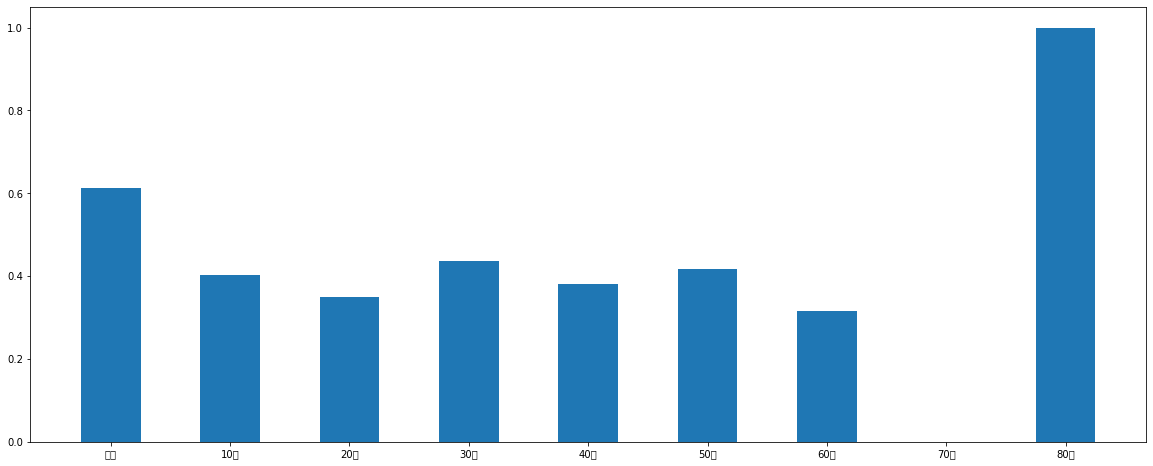

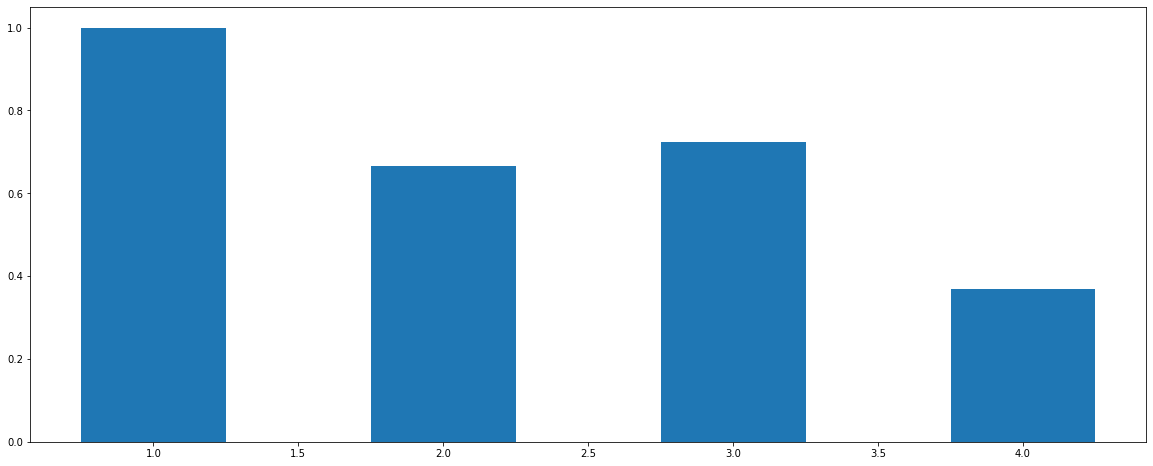

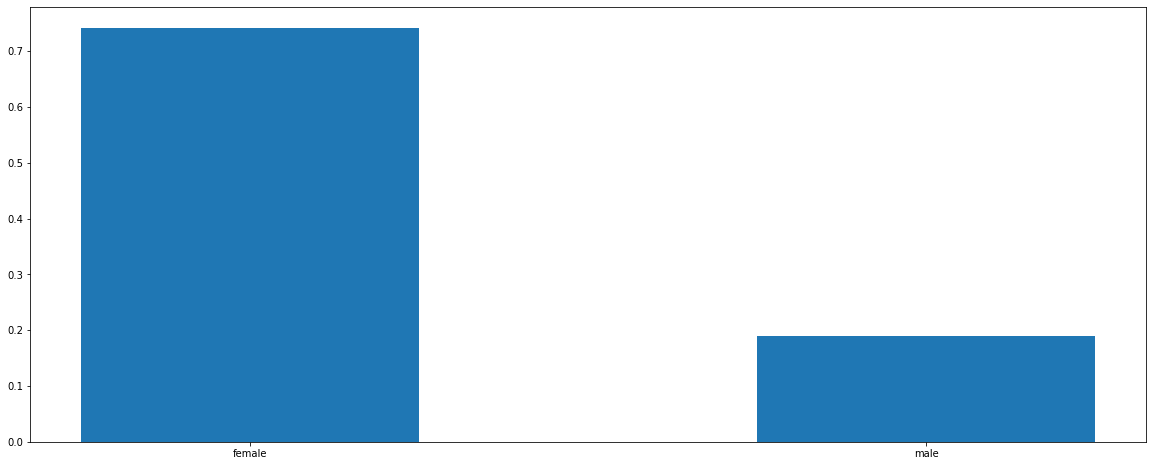

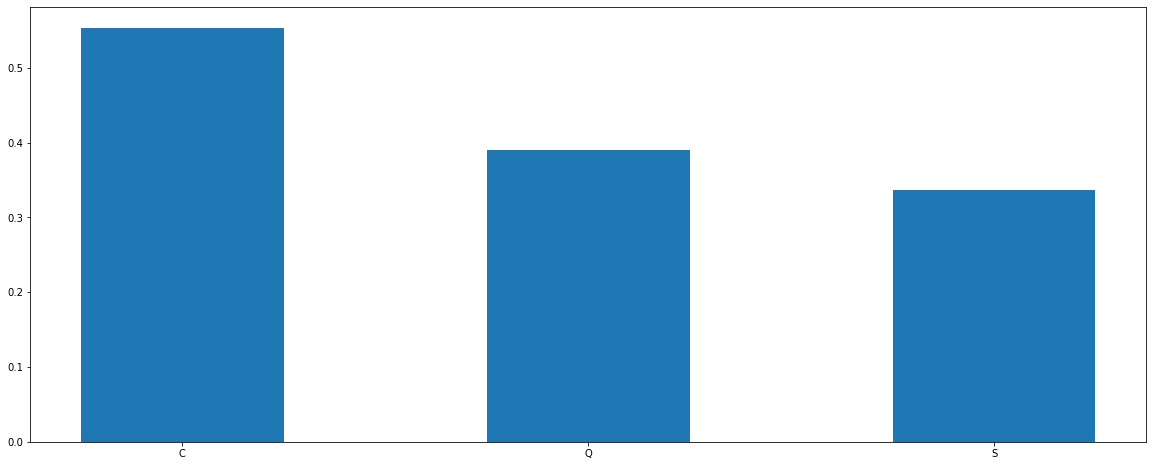

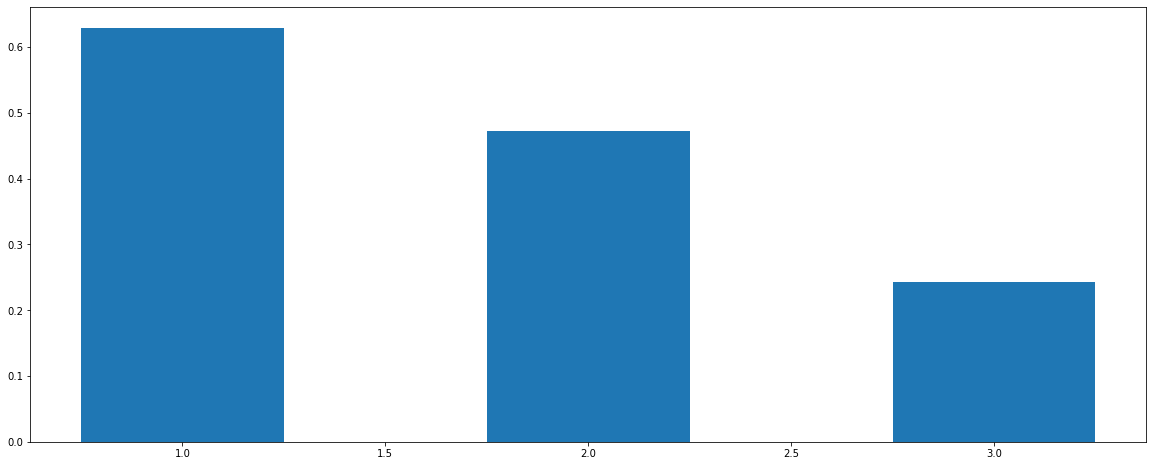

In [372]:
# 생존확률이 가장높은 확률

# 연령별 고유값 조사
import matplotlib.pyplot as plt

# # Matplotlib 한글 폰트 설정
# from matplotlib import font_manager as fm, rc

# # 한글 폰트 설정
# font_path = '../Fonts/malgun.ttf'
# font_name = fm.FontProperties(fname = font_path).get_name()
# rc('font', family = font_name)

def makebar(label, value):
    """
    label: x축, value: y축 ---> 생존율 그래프 그려줌
    """
    width = 0.5
    plt.rcParams['figure.figsize'] = (20,8)
    plt.bar(label, value, width)
    plt.show()

shipdf['연령별'].unique()
def survived(df, col):
    # col의 고유값 기준으로 개수 total에 저장
    total = df[col].value_counts()
    total.sort_index(inplace=True)

    cond = shipdf['Survived'] == 1 
    surv = df[cond][col].value_counts()
    surv.sort_index(inplace= True)
    survival_rate_age = surv / total
    makebar(survival_rate_age.index, survival_rate_age)


survived(shipdf, '연령별')
survived(shipdf, "요금별")
survived(shipdf, "Sex")
survived(shipdf, "Embarked")
survived(shipdf, "Pclass")
